# 1. Case Study

## Data Set Problems 
Dataset "Titanic" menjelaskan data yang dapat digunakan untuk memprediksi penumpang Kapal Titanic yang selamat dari tragedi tenggelam. Dalam dataset, terdapat informasi umum dan rinci mengenai <b>usia (age), jenis kelamin (gender), kelas penumpang (passenger class), tarif penumpang (fare), dan lokasi kabin (cabin location)</b> untuk setiap penumpang kapal. Dalam notebook ini, akan dilakukan prediksi apakah penumpang selamat berdasarkan variabel/feature yang ada dengan model machine learning.  Digunakan train dataset untuk membangun model dan test dataset untuk mengevaluasi performance dari model yang dibangun.

---

## Tahap Pengerjaan
**Dalam Notebook, akan filakukan:**
*   Pre-processing data 
*   Eksplorasi data dengan beberapa data visualization
*   Membangun model Machine Learning untuk memprediksi penumpang kapal
*   Membentuk prediksi dalam format csv.

**Beberapa model machine learning yang digunakan antara lain:** 
1. Logistic Regression
2. K Neighbors Classifier
3. Decision Tree
4. Random Forest
5. Gradient Boosting

---

## Detail Dataset

Terdapat **12 variabel** dalam dataset:
*   **4 kategorikal** variabel, (Survived, Pclass, Sex, Embarked)
*   **4 kontinu** variabel, (Age, SibSp, Parch, Fare)
*   **1** variabel mengenai ID penumpang, (PassengerID)
*   **1** variabel mengenai nama penumpang, (Name)
*   **1** variabel mengenai nomor tiket penumpang, (Ticket)
*   **1** variabel berupa nomor kabin penumpang. (Cabin)

<br>

Berikut merupakan struktur dari variabel yang ada:


<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>PassengerId</b></td>
<td>ID of passenger <br> (unique ID)</td>
<td>1; 2; ...</td>
</tr>
<tr>
<td><b>Survived</b></td>
<td>Survival status <br> (0 = No, 1 = Yes)</td>
<td>0; 1; ...</td>
</tr>
<tr>
<td><b>Pclass</b></td>
<td>Ticket class <br> (1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower)</td>
<td>1; 3; ...</td>
</tr>
<tr>
<td><b>Name</b></td>
<td>Passenger name <br> (unique)</td>
<td>Braund, Mr. Owen Harris; Heikkinen, Miss. Laina; ...</td>
</tr>
<tr>
<td><b>Sex</b></td>
<td>Passenger gender <br> (male or female)</td>
<td>male; female; ...</td>
</tr>
<tr>
<td><b>Age</b></td>
<td>Passenger age <br> (in years)</td>
<td>22; 38; ...</td>
</tr>
<tr>
<td><b>SibSp</b></td>
<td>No of siblings / spouses aboard the Titanic</td>
<td>0; 3; ...</td>
</tr>
<tr>
<td><b>Parch</b></td>
<td># of parents / children aboard the Titanic</td>
<td>1; 2; ...</td>
</tr>
<tr>
<td><b>Ticket</b></td>
<td>Ticket number<br> (unique)</td>
<td>A/5 21171; PC 17599; ...</td>
</tr>
<tr>
<td><b>Fare</b></td>
<td>Passenger fare</td>
<td>7.25; 71.2833; ...</td>
</tr>
<tr>
<td><b>Cabin</b></td>
<td>Cabin number</td>
<td>C85; C123; ...</td>
</tr>
<tr>
<td><b>Embarked</b></td>
<td>Embarkation port<br> (C = Cherbourg, Q = Queenstown, S = Southampton)</td>
<td>C; S; ...</td>
</tr>
</tbody>
</table>

---


# 2. Import Library
Melakukan import library yang digunakan selama proses pengerjaan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

warnings.simplefilter(action='ignore', category=FutureWarning)

# 3. Read Dataset
Setelah mengimpor library, selanjutnya melakukan impor dataset; train dan test.

In [2]:
train_ds = pd.read_csv("../input/titanic/train.csv") #data training
test_ds = pd.read_csv("../input/titanic/test.csv") #data testing

In [3]:
train_ds.head() #melihat 5 data teratas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train_ds.info()) #melihat struktur atau informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
test_ds.head() #melihat 5 data teratas

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(test_ds.info()) #melihat struktur atau informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


Dalam **train** data, terlihat **tipe data** dari setiap feature/column yaitu dapat berupa integer/object/float, selain itu **terdeteksi adanya missing values/null values** dalam kolom tertentu ditandai dengan adanya data bernilai NaN. 
Seperti halnya pada train data, terdapat **beberapa null values juga dalam test data.**

# 4. Eksplorasi Data

## 4.1 Distribusi Keselamatan Penumpang (Survived Variable)

In [7]:
train_ds.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

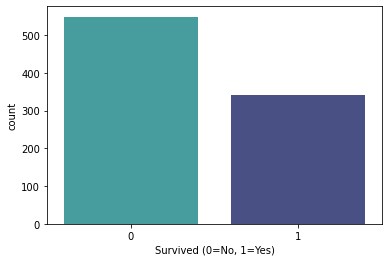

In [8]:
sns.countplot(x="Survived", data=train_ds, palette="mako_r")
plt.xlabel('Survived (0=No, 1=Yes)')
plt.show()

In [9]:
countNotSurvive = len(train_ds[train_ds.Survived == 0])
countSurvive = len(train_ds[train_ds.Survived == 1])
print("Persentase Not Survive: {:.2f}%".format((countNotSurvive / (len(train_ds.Survived))*100)))
print("Persentase Survive: {:.2f}%".format((countSurvive / (len(train_ds.Survived))*100)))

Persentase Not Survive: 61.62%
Persentase Survive: 38.38%


Dalam train dataset, terdapat 891 penumpang kapal, dan hanya 342 penumpang yang selamat. Dari hasil visualisasi dalam bar chart di atas, diketahui bahwa **persentase penumpang yang tidak selamat lebih besar yaitu sebesar 61.62% (atau sebanyak 549 orang)** dibandingkan dengan persentase penumpang selamat dalam kejadian tenggelam kapal.

## 4.2 Distribusi Jenis Kelamin Penumpang (Sex)

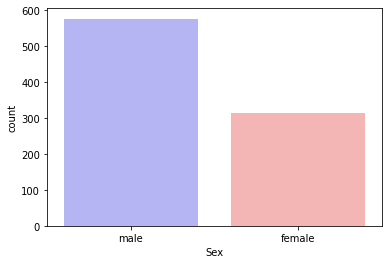

In [10]:
sns.countplot(x='Sex', data=train_ds, palette="bwr")
plt.xlabel("Sex")
plt.show()

In [11]:
countFemale = len(train_ds[train_ds.Sex == "female"])
countMale = len(train_ds[train_ds.Sex == "male"])
print("Persentase Female: {:.2f}%".format((countFemale / (len(train_ds.Sex))*100)))
print("Percentase Male: {:.2f}%".format((countMale / (len(train_ds.Sex))*100)))

Persentase Female: 35.24%
Percentase Male: 64.76%


Dari hasil visualisasi dalam bar chart di atas, diketahui bahwa **banyaknya penumpang laki-laki lebih besar daripada penumpang perempuan yaitu sebesar 64.76%.**

## 4.3 Visualisasi Penumpang Selamat (Survived) berdasarkan Jenis Kelamin (Gender)

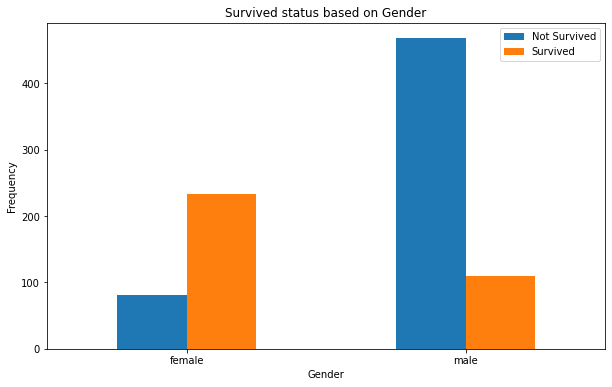

In [12]:
pd.crosstab(train_ds.Sex,train_ds.Survived).plot(kind="bar",figsize=(10,6))
plt.title('Survived status based on Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(["Not Survived", "Survived"])
plt.ylabel('Frequency')
plt.show()

Dari hasil visualisasi dalam bar chart di atas, diketahui bahwa: <br>
- Banyaknya penumpang laki-laki yang tidak selamat lebih besar <br>
- Banyaknya jumlah penumpang perempuan yang selamat lebih besar

## 4.4 Visualisasi Penumpang Selamat (Survived) berdasarkan Usia (Age)

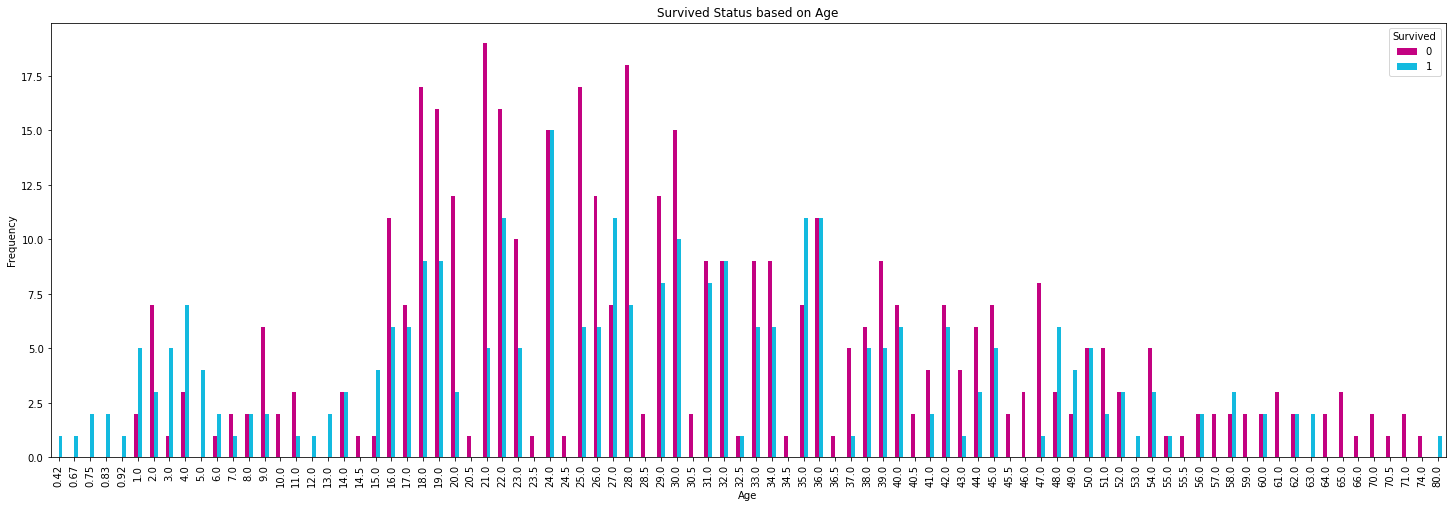

In [13]:
pd.crosstab(train_ds.Age,train_ds.Survived).plot(kind="bar",figsize=(25,8), color=['#C30281','#13BADF'])
plt.title('Survived Status based on Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Dari hasil visualisasi dalam bar chart di atas, diketahui bahwa mayoritas dari penumpang yang tidak selamat berada pada **rentang usia antara 16 sampai 30 tahun.** Kemudian, penumpang yang tidak selamat juga masih terbilang tinggi pada rentang usia 30 sampai 47 tahun.

## 4.5 Visualisasi Kelas Penumpang (Pclass) berdasarkan Usia (Age)

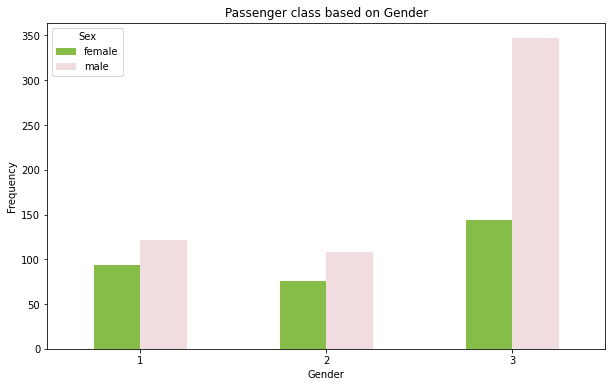

In [14]:
pd.crosstab(train_ds.Pclass,train_ds.Sex).plot(kind="bar",figsize=(10,6), color=['#86BD49','#F1DDDF'])
plt.title('Passenger class based on Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Dari hasil visualisasi dalam bar chart di atas, terlihat bahwa **jumlah penumpang kelas 1 dan 2 jauh lebih sedikit** dibandingkan dengan penumpang kelas 3 pada kedua gender.

# 5. Dataset Preprocessing
Sebelum membangun pemodelan machine learning, terlebih dahulu akan dilakukan pre-processing data, termasuk diantaranya adalah **pendeteksian missing values dan imputasi, feature engineering,encoding, dan drop columns yang tidak digunakan**.

## 5.1 Pendeteksian Missing Values

In [15]:
train_ds.isnull().sum() #menghitung jumlah null/missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

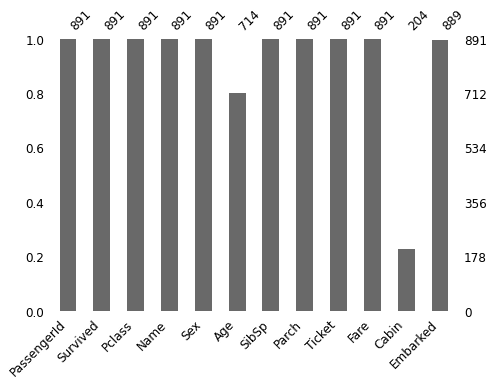

In [16]:
plt.figure(figsize = (16, 5))
ax_train = plt.subplot(1,2,2)
mso.bar(train_ds, ax = ax_train, fontsize = 12)

Terlihat adanya missing value pada beberapa kolom di dataset training, yaitu **Age, Cabin, dan Embarked.**

In [17]:
test_ds.isnull().sum() #menghitung jumlah null/missing values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

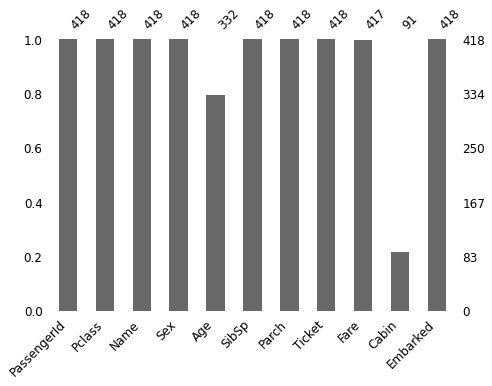

In [18]:
plt.figure(figsize = (16, 5))
ax_train = plt.subplot(1,2,2)
mso.bar(test_ds, ax = ax_train, fontsize = 12)

Terlihat adanya missing value pada beberapa kolom di dataset training, yaitu **Age, Cabin, dan Fare.**

## 5.2 Penanganan Missing Values
Dalam menangani missing values, dapat digunakan teknik **imputasi** yaitu melakukan subsitusi dengan nilai estimasi untuk missing value yang ada, seperti dengan nilai mean atau mediannya. Dalam hal ini, imputasi akan dilakukan pada variabel dengan missing value (Age pada Train dan Test, dan Fare pada Test) menggunakan **nilai mean.** Adapun untuk variabel Cabin tidak dilakukan penanganan karena nantinya variabel tersebut tidak digunakan dalam melakukan pemodelan.

In [19]:
# Age (with mean)
train_ds['Age'] = train_ds['Age'].fillna(train_ds['Age'].mean())
test_ds['Age'] = test_ds['Age'].fillna(test_ds['Age'].mean())

In [20]:
# Fare (with mean)
test_ds['Fare'] = test_ds['Fare'].fillna(test_ds['Fare'].mean())

## 5.3 Distribusi Numerical Value
Selanjutnya akan dilihat bentuk **distribusi** dari variabel dengan nilai numerik dan **melihat skewness** setiap variabel numerik (PassengerID, Survived, Pclass, Age, SibSp, Parch, dan Fare)

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

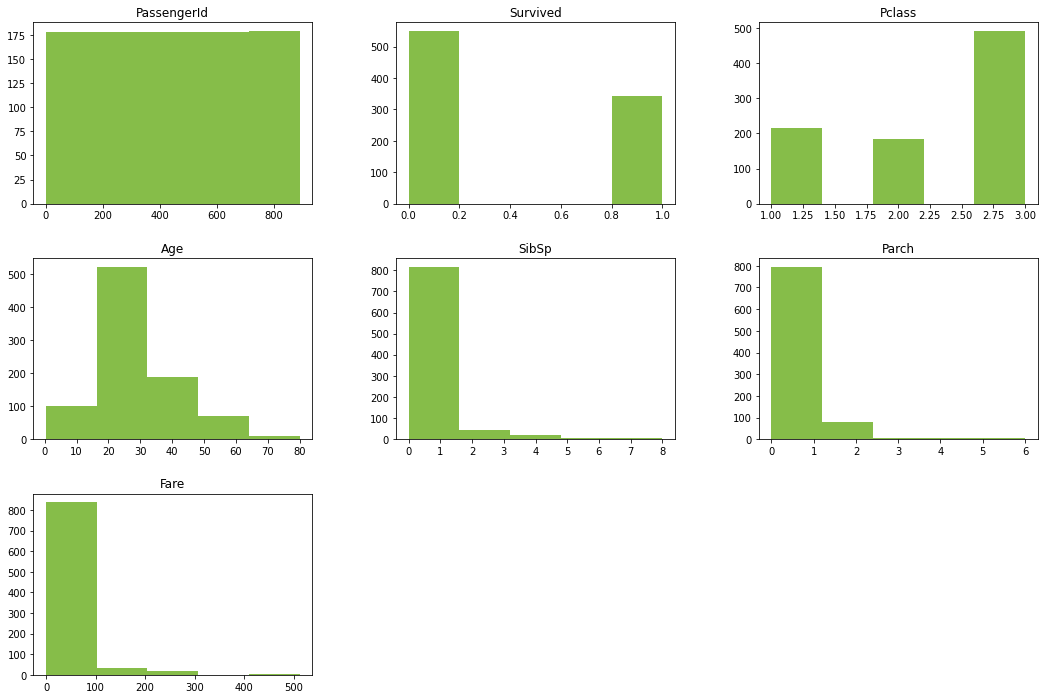

In [21]:
train_ds.hist(grid=False, figsize=(18, 12), bins=5, color='#86BD49')

In [22]:
train_ds.skew(axis = 0, skipna = True)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

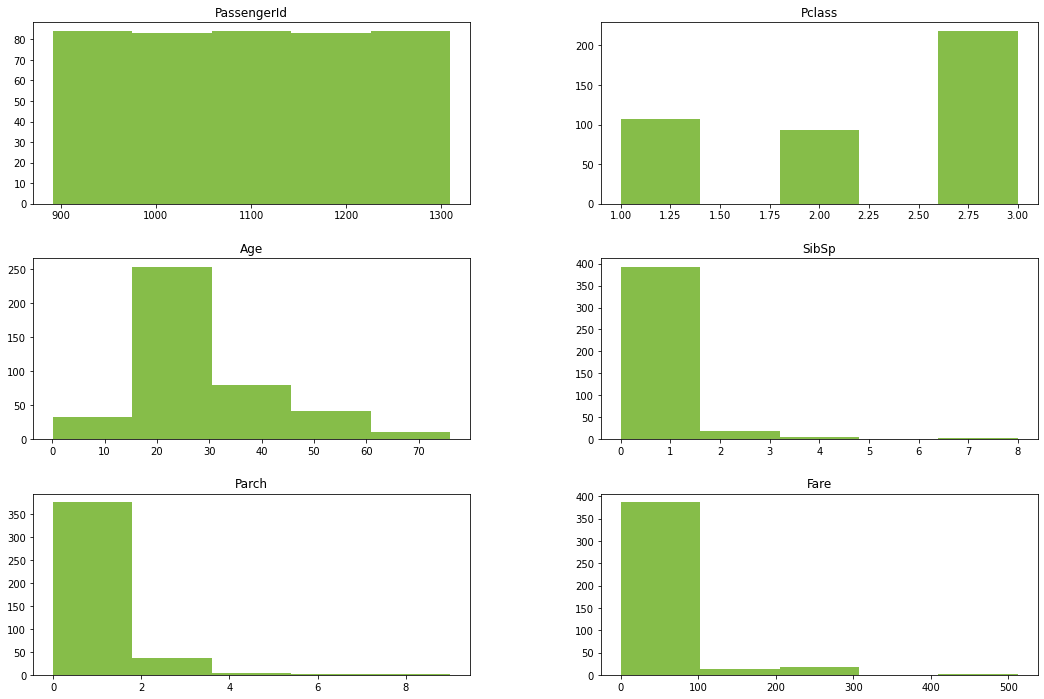

In [23]:
test_ds.hist(grid=False, figsize=(18, 12), bins=5, color='#86BD49')

In [24]:
test_ds.skew(axis = 0, skipna = True)

PassengerId    0.000000
Pclass        -0.534170
Age            0.512711
SibSp          4.168337
Parch          4.654462
Fare           3.691600
dtype: float64

Skewness pada variabel **SibSp, Parch, dan Fare tinggi**, sehingga akan dilakukan transformasi data dengan square root untuk data training dan testing.

## 5.4 Transformasi dengan square root

In [25]:
train_ds.Fare = np.sqrt(train_ds.Fare)
test_ds.Fare = np.sqrt(test_ds.Fare)

train_ds.SibSp = np.sqrt(train_ds.SibSp)
test_ds.SibSp = np.sqrt(test_ds.SibSp)

train_ds.Parch = np.sqrt(train_ds.Parch)
test_ds.Parch = np.sqrt(test_ds.Parch)

## 5.5 Feature Engineering
Dengan menggunakan **one-hot-encoding**, yaitu melakukan transformasi variabel kategorikal ke dalam bentuk yang dapat dipahami pada algoritma machine learning. Hal ini dilakukan untuk meningkatkan keakuratan dari prediksi.

In [26]:
train_ds = pd.get_dummies(train_ds, columns=['Sex', 'Embarked', 'Pclass'])
test_ds = pd.get_dummies(test_ds, columns=['Sex', 'Embarked', 'Pclass'])

In [27]:
train_ds.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,2.692582,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,8.442944,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,2.815138,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,7.286975,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,2.837252,NaN,0,1,0,0,1,0,0,1


In [28]:
test_ds.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",34.5,0.0,0.0,330911,2.798071,NaN,0,1,0,1,0,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1.0,0.0,363272,2.645751,NaN,1,0,0,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0.0,0.0,240276,3.112475,NaN,0,1,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0.0,0.0,315154,2.943213,NaN,0,1,0,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1.0,1.0,3101298,3.505353,NaN,1,0,0,0,1,0,0,1


## 5.6 Menghapus Kolom Cabin, Name, PassengerID
Karena berupa unique data sehingga tidak digunakan dalam pemodelan.

In [29]:
train_ds = train_ds.drop(['Cabin','Name','Ticket'], axis = 1)
test_ds = test_ds.drop(['Cabin','Name','Ticket'], axis = 1)

In [30]:
train_ds1 = train_ds.drop(['PassengerId'], axis = 1)
test_ds1 = test_ds.drop(['PassengerId'], axis = 1)

# 6. Dataset Preparation

## 6.1 Split dataset dengan rasio: 80% training, 20% testing

In [31]:
predictors = train_ds1.drop(["Survived"], axis=1) #mendapat prediktor dgn menghapus kolom survived
target = train_ds1["Survived"]
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

## 6.2 Menangani imbalance data dengan teknik SMOTE
Karena banyaknya penumpang tidak selamat lebih besar dibandingkan banyaknya penumpang selamat, maka terindikasi imbalance data, perlu ditangani **agar menghindari terjadinya overfitting** pada hasil prediksi nantinya.

In [32]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

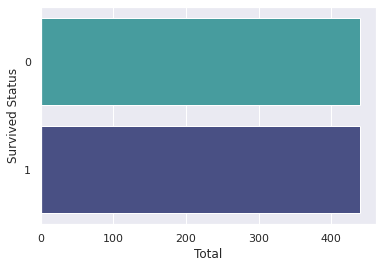

In [33]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=test_ds, palette="mako_r")
plt.ylabel('Survived Status')
plt.xlabel('Total')
plt.show()

# 7. Model Building

## 7.1 Logistic Regression
Regresi logistik adalah metode statistik yang digunakan untuk membangun model machine learning yang variabel terikatnya bersifat dikotomis: yaitu biner. Regresi logistik digunakan untuk menggambarkan data dan hubungan antara satu variabel terikat dengan satu atau lebih variabel bebas. Variabel bebasnya dapat bertipe nominal, ordinal, atau interval.

Nama “regresi logistik” diambil dari konsep fungsi logistik yang digunakannya. Fungsi logistik disebut juga fungsi sigmoid. Nilai fungsi logistik ini terletak antara nol dan satu.

In [34]:
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(x_train, y_train)

y_pred = LRclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
LRAcc = accuracy_score(y_pred,y_test)

print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       110
           1       0.71      0.80      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.81      0.80      0.80       179

[[88 22]
 [14 55]]
Logistic regression accuracy: 79.89%


## 7.2 Decision Tree
Decision Tree adalah teknik Supervised learning yang dapat digunakan untuk masalah klasifikasi dan Regresi, namun umumnya lebih disukai untuk menyelesaikan masalah Klasifikasi. Dalam algoritma ini terdapat node internal mewakili fitur kumpulan data, cabang (branches) mewakili aturan keputusan, dan setiap node daun (leaf node) mewakili hasilnya.

Terdapat dua node, yaitu Decision Node dan Leaf Node. Decision Node digunakan untuk membuat keputusan apa pun dan memiliki banyak cabang, sedangkan Decision Leaf adalah keluaran dari keputusan tersebut dan tidak berisi cabang lebih lanjut.

In [35]:
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=10)
DTclassifier.fit(x_train, y_train)

y_pred = DTclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
DTAcc = accuracy_score(y_pred,y_test)

print('Decision tree accuracy: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.70      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

[[99 11]
 [21 48]]
Decision tree accuracy: 82.12%


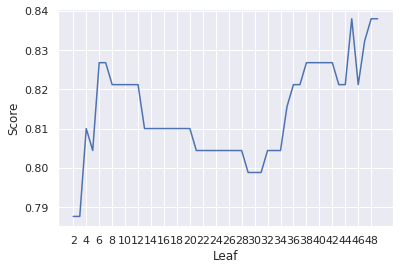

DT Acc Max: 83.80%


In [36]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(x_train, y_train)
    scoreListDT.append(DTclassifier.score(x_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,2))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max: {:.2f}%".format(DTAccMax*100))

## 7.4 K Neighbors Classifier
Algoritma k-nearest neighbours (KNN) adalah metode klasifikasi data untuk memperkirakan kemungkinan suatu titik data akan menjadi anggota suatu kelompok atau kelompok lain berdasarkan pada kelompok mana titik data yang paling dekat dengannya berada. Algoritme k-nearest neighbour adalah jenis algoritma supervised machine learning  yang digunakan untuk menyelesaikan masalah klasifikasi dan regresi.

KNN disebut lazy learning algorithm karena algoritma ini tidak melakukan pelatihan apa pun pada data pelatihan. Sebaliknya, algoritma hanya menyimpan data selama waktu pelatihan dan tidak melakukan penghitungan apa pun. Hal ini menjadikan KNN ideal untuk data mining.

In [37]:
KNclassifier = KNeighborsClassifier(n_neighbors=50)
KNclassifier.fit(x_train, y_train)

y_pred = KNclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
KNAcc = accuracy_score(y_pred,y_test)

print('K Neighbors Classifier accuracy: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       110
           1       0.65      0.65      0.65        69

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.73      0.73       179

[[86 24]
 [24 45]]
K Neighbors Classifier accuracy: 73.18%


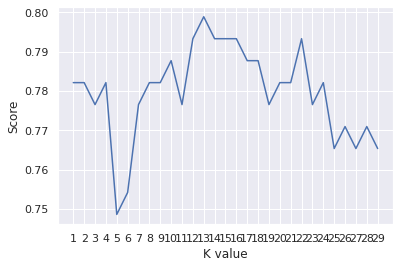

KNN Acc Max: 79.89%


In [38]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(x_train, y_train)
    scoreListknn.append(KNclassifier.score(x_test, y_test))
    
plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max: {:.2f}%".format(KNAccMax*100))

## 7.5 Random Forest
Random Forest adalah algoritma tree-based machine learning yang memanfaatkan kekuatan beberapa decision tree untuk mengambil keputusan. Setiap tree di random forest mengeluarkan prediksi kelas dan kelas dengan suara terbanyak menjadi prediksi model.

In [39]:
RFclassifier = RandomForestClassifier(max_leaf_nodes=10)
RFclassifier.fit(x_train, y_train)

y_pred = RFclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

[[95 15]
 [19 50]]
Random Forest accuracy is: 81.01%


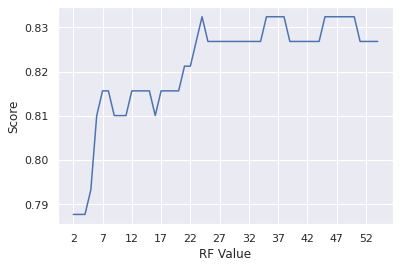

RF Acc Max: 83.24%


In [40]:
scoreListRF = []
for i in range(2,55):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(x_train, y_train)
    scoreListRF.append(RFclassifier.score(x_test, y_test))
    
plt.plot(range(2,55), scoreListRF)
plt.xticks(np.arange(2,55,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max: {:.2f}%".format(RFAccMax*100))

## 7.6 Gradient Boosting
Gradient boosting merupakan algoritma klasifikasi machine learning yang menggunakan ensamble dari decision tree untuk memprediksi nilai. Gradient boosting termasuk supervised learning berbasis decision tree yang dapat digunakan untuk klasifikasi. Gradient boosting dimulai dengan menghasilkan pohon klasifikasi awal dan terus menyesuaikan pohon baru melalui minimalisasi fungsi kerugian.

Pada setiap iterasi, Gradient Boosting akan menambahkan weak learner baru dan mengoreksi prediksi sebelumnya dengan memperhitungkan kesalahan pada prediksi tersebut. Secara matematis, Gradient Boosting mengoptimalkan suatu fungsi objektif dengan mengevaluasi gradient pada setiap titik.

Dalam setiap iterasi, Gradient Boosting memperbarui residual error dengan mengurangi hasil prediksi dari target, lalu menambahkan weak learner baru yang menyelesaikan masalah residual error yang dihasilkan.

In [41]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [42]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=10)
GB.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [43]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=10)
0.8395898641588296
{'n_estimators': 100, 'max_leaf_nodes': 10, 'max_depth': 5}
6


In [44]:
GBclassifier = GradientBoostingClassifier(n_estimators=400, max_depth=3, max_leaf_nodes=10)
GBclassifier.fit(x_train, y_train)

y_pred = GBclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy is: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       110
           1       0.83      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179

[[100  10]
 [ 19  50]]
Gradient Boosting accuracy is: 83.80%


# 8. Perbandingan Model

In [45]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'K Neighbors Classifier', 'Random Forest Classifier'
                                 ,'Random Forest Max', 'K Neighbors Max', 'Decision Tree Max', 'Gradient Boosting'], 
                        'Accuracy': [LRAcc*100, DTAcc*100, KNAcc*100, RFAcc*100, RFAccMax*100, 
                                     KNAccMax*100, DTAccMax*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
6,Decision Tree Max,83.798883
7,Gradient Boosting,83.798883
4,Random Forest Max,83.240223
1,Decision Tree,82.122905
3,Random Forest Classifier,81.005587
0,Logistic Regression,79.888268
5,K Neighbors Max,79.888268
2,K Neighbors Classifier,73.184358


Dari beberapa model algoritma yang diterapkan, diperoleh beberapa model dengan akurasi diatas 80%. Kemudian, dilakukan perbandingan akurasi pada training - testing sebagai berikut.
* LR : 79,33
* DT : 82,68 - 82,68
* GB : 84,635 - 82,682
* RF : 83,80 - 81,56
* KNN : 80,45 - 73,18

Dari hasil training dan testing akurasi di atas, dua model (Decision Tree dan Gradient Boosting) yang diuji memiliki kesesuaian yang baik. Namun model lainnya mengalami overfitting. Hal ini dikarenakan perbedaan akurasi latihan dan tes atau sebaliknya relatif tinggi.

Melihat skor F1 masing-masing model, dapat disimpulkan bahwa model yang diuji mampu mengklasifikasikan penumpang yang tidak selamat sangat baik (skor F1 di atas 0,8) namun cukup baik pada penumpang selamat (skor F1 di atas 0,7). Namun perbedaan skor F1 untuk masing-masing model masuk akal karena nilai target sebenarnya dalam dataset pengujian juga berbeda cukup jauh (260 penumpang tidak selamat dan 158 penumpang selamat). 

Model terbaik (Gradient Boosting) yang dipilih memiliki skor F1 di atas rata-rata, dimana skor F1 untuk penumpang tidak selamat sebesar 0,87, sedangkan skor F1 untuk penumpang selamat sebesar 0,76. Nilai presisi keempat model terbaik juga kurang lebih sama, dimana 83% dari seluruh penumpang yang diprediksi model tersebut selamat dari bencana Titanic. Sebaliknya, untuk nilai recall pada model terbaik, model tersebut memprediksi dengan tepat 70% dari seluruh penyintas.

# 9. Output
Membuat hasil output dengan algoritma Gradient Boost ke dalam **file berformat csv.**

## 9.1 Making output file

In [46]:
GBclassifier = GradientBoostingClassifier(n_estimators=400, max_depth=3, max_leaf_nodes=10)
GBclassifier.fit(x_train, y_train)

y_pred = GBclassifier.predict(x_test)

prediction = GBclassifier.predict(test_ds1)

In [47]:
output = pd.DataFrame({'PassengerId': test_ds['PassengerId'] , 'Survived': prediction})
output.to_csv('submission.csv', index=False)

## 9.2 Output File (CSV)

In [48]:
predcsv = pd.read_csv('./submission.csv')
predcsv.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


# 10. Saran
Berikut ini saran yang dapat diberikan kepada peneliti selanjutnya:
* Feature Engineering: eksplorasi dan transformasi lebih lanjut dari fitur yang ada dan/atau pembuatan fitur baru untuk meningkatkan kinerja model.
* Pemilihan algoritma: menguji berbagai algoritma dan metode ansambel untuk menemukan yang paling cocok untuk masalah ini.
* Penyetelan hyperparameter: mengoptimalkan hyperparameter dari algoritma yang dipilih untuk mencapai kinerja yang lebih baik.
* Memasukkan data tambahan: termasuk data relevan lainnya seperti informasi awak kapal atau biografi penumpang untuk meningkatkan akurasi model dan memberikan gambaran bencana yang lebih lengkap.
* Mencoba model prediktif lainnya: bereksperimen dengan model prediktif yang lebih canggih seperti model deep learning atau reinforcement learning.